# use pandas and seaborns to describe the using dataset.
# like pie chart and hist diagram

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

def visualize_data_distribution(train_path="train.csv", val_path="val.csv", save_dir="saved_visual", show=False):
    os.makedirs(save_dir, exist_ok=True)
    sns.set(style="whitegrid", palette="muted", font_scale=1.0)

    train = pd.read_csv(train_path)
    val = pd.read_csv(val_path)
    train["set"] = "Train"
    val["set"] = "Validation"
    df = pd.concat([train, val], ignore_index=True)

    df["feedback_text"] = df["feedback_text"].fillna("").astype(str)
    df["text_len"] = df["feedback_text"].apply(lambda x: len(x.split()))

    label_cols = ["sentiment", "urgency", "topic", "action"]

    # ========= 图① 文本长度分布 =========
    plt.figure(figsize=(12, 10))
    sns.kdeplot(data=df, x="text_len", hue="set", fill=True, alpha=0.4, linewidth=2)
    plt.title("Text Length Distribution (Train vs Validation)", fontsize=13, weight="bold")
    plt.xlabel("Number of Words")
    plt.ylabel("Density")
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, "text_length_comparison.png"), dpi=200)
    if show: plt.show()
    plt.close()

    # ========= 图② 多任务标签分布 =========
    melted = df.melt(id_vars="set", value_vars=label_cols, var_name="Task", value_name="Label")

    g = sns.catplot(
        data=melted,
        x="Label", hue="set", col="Task",
        kind="count",
        height=3.8, aspect=1.25,      # 图整体更宽、更高
        palette="Set2",
        sharey=False,
        col_wrap=2                    # 2x2 布局
    )

    g.set_titles("{col_name}")
    # g.subplots_adjust(top=0.9)
    # g.set_titles("Label Distribution per Task (Train vs Validation)", fontsize=13, weight="bold")

    for ax in g.axes.flat:
        # 标签更宽松
        ax.tick_params(axis="x", rotation=30, labelsize=9)  # 角度更小、更易读
        ax.set_xticklabels(ax.get_xticklabels(), ha="right") # 标签向右对齐
        ax.set_xlabel("Attributes")  
        ax.set_ylabel("Count")
        # 增加 x 轴标签之间的间距
        ax.set_xticks(range(len(ax.get_xticklabels())))
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=30, ha='right')
        ax.margins(x=0.1)   # ← 关键：让标签间距更宽松

    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, "label_distribution_comparison.png"), dpi=250, bbox_inches="tight")
    if show:
        plt.show()
    plt.close()



    # ========= 图③ 标签相关性热力图 =========
    plt.figure(figsize=(6, 5))
    corr = train[label_cols].apply(lambda x: pd.factorize(x)[0]).corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 9})
    plt.title("Label Correlation Matrix (Train Set)", fontsize=13, weight="bold")
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, "label_correlation_train.png"), dpi=200)
    if show: plt.show()
    plt.close()

    print(f"✅ 3-key data distribution figures saved in '{save_dir}/'")


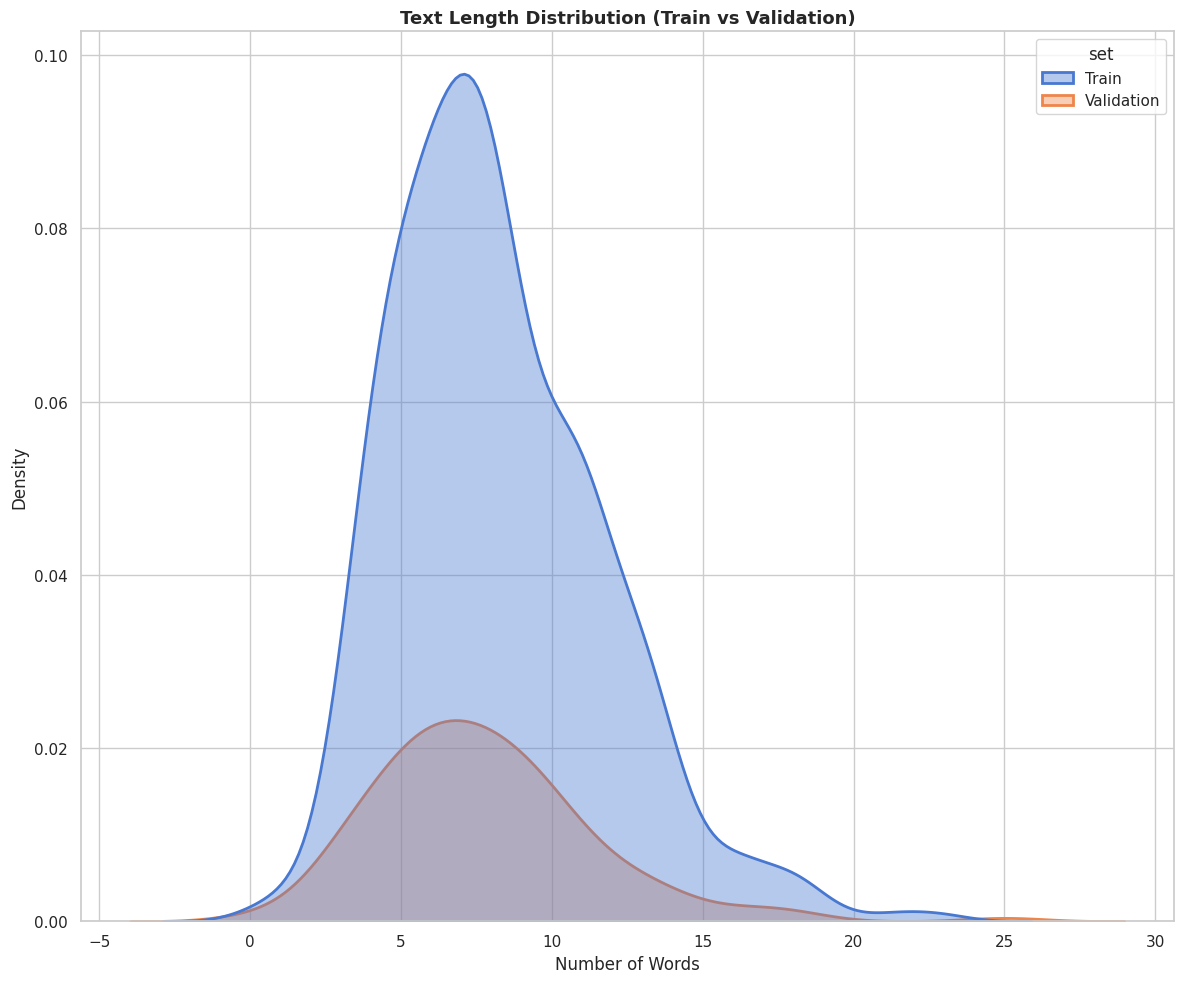

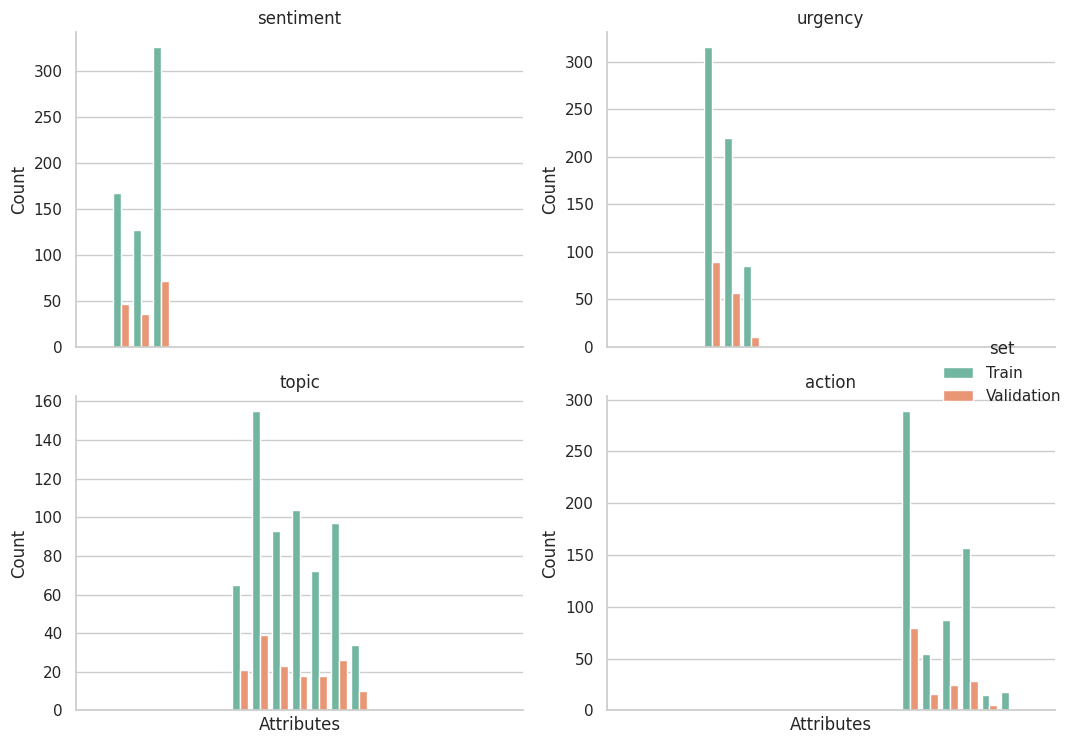

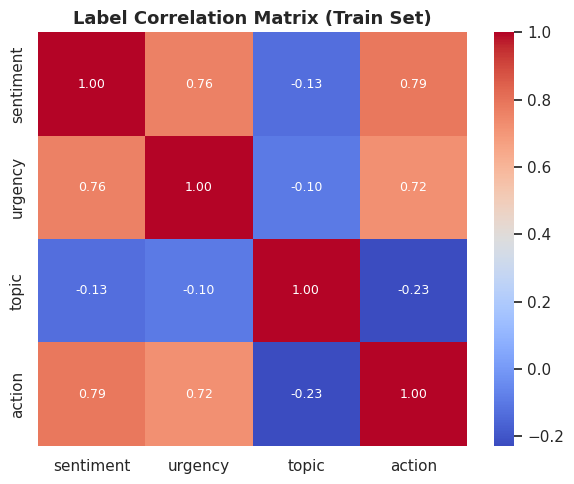

✅ 3-key data distribution figures saved in 'saved_visual/'


In [3]:
if __name__ == "__main__":
    # === Step 1: 数据集分析 ===
    visualize_data_distribution("train.csv", show=True)
    # visualize_data_distribution("val.csv", show=True)
